# <font color="orange">**Algorítmo Genético Contínuo.**</font>
```
REFERÊNCIA:
Haupt, R. L. and Haupt, S. E. Practical Genetic Algorithms. Wiley-Interscience, 2a Edição. 2004.
```




---
<font color="cyan">**Equipe:**</font>

Allan Jorge

Rafael Azevedo

Rômulo Rodrigues


---
## Objetivo do algorítmo
$$\text{Encontrar o mínimo de } f(x, y) = -e^{-0.2 \sqrt{x^2 + y^2} + 3 (\cos(2x) + \sin(2y))}, \text{ sujeito a } -5 ≤ x ≤ 5 \text{ e } -5 ≤ y ≤ 5.$$
<!-- $$f(x, y) = -e^{0.2 \sqrt{x^2 + y^2} + 3 (\cos(2x) + \sin(2y))}$$ -->
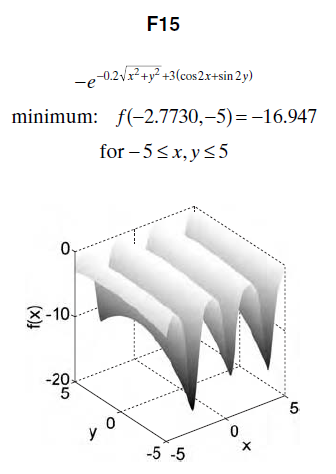


---
## Fluxograma de um Algorítmo Genético Contínuo
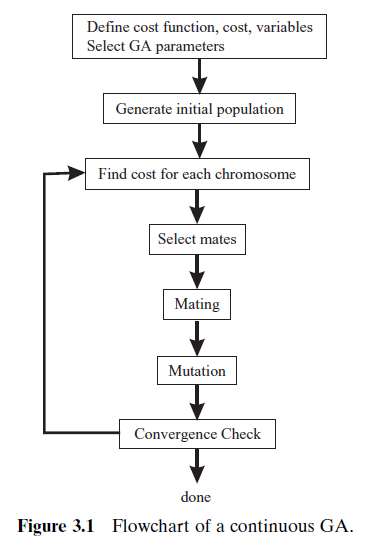

---
## <font color="orange">Função de custo</font>
$$f(x, y) = -e^{-0.2 \sqrt{x^2 + y^2} + 3 (\cos(2x) + \sin(2y))}$$

In [ ]:
# Bibliotecas
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Função de custo
def f_custo(x):
    # return x[:, 1] * np.sin(4 * x[:, 0]) + 1.1 * x[:, 0] * np.sin(2 * x[:, 1])  #F8
    return -np.exp(0.2 * np.sqrt((x[:, 0] - 1)**2 + (x[:, 1] - 1)**2) + (np.cos(2 * x[:, 0]) + np.sin(2 * x[:, 0])))  #F15 duvidosa
    # return -np.exp(-0.2 * np.sqrt((x[:, 0])**2 + (x[:, 1]**2)) + 3 * (np.cos(2 * x[:, 0]) + np.sin(2 * x[:, 1])))  #F15 real
    # return x[:, 0] * np.sin(np.sqrt(np.abs(x[:, 0])-(x[:, 1]) + 9))-(x[:,1] + 9)*np.sin(np.sqrt(abs(x[:,1] + 0.5 * x[:,0] + 9)));   # F16 duvidosa
    # return -x[:, 0] * np.sin(np.sqrt(np.abs(x[:, 0])-(x[:, 1]) + 9))-(x[:,1] + 9)*np.sin(np.sqrt(abs(x[:,1] + 0.5 * x[:,0] + 9)));  # F16 real

    # A função é definida para receber um array bidimensional x, onde cada linha representa um indivíduo da população e cada coluna representa uma variável de entrada:
      # x[:, 0] corresponde à primeira variável (x).
      # x[:, 1] corresponde à segunda variável (y).

# Parâmetros da função
n_var = 2              # Número de variáveis de otimização
lim_inf = -5            # Limite inferior das variáveis
lim_sup = 5           # Limite superior das variáveis

---
## <font color="orange">Critérios de parada</font>


In [ ]:
max_iter = 100           # Número máximo de iterações (gerações)
custo_min = -9999999     # Custo mínimo aceitável

---
## <font color="orange">Parâmetros do AG</font>

In [ ]:
tam_pop = 12            # Tamanho da população
taxa_mut = 0.2           # Taxa de mutação
selecao = 0.5            # Fração da população mantida

sobreviventes = int(np.floor(selecao * tam_pop))  # Número de sobreviventes.
# np.floor arredonda o valor para baixo (para garantir que o número de sobreviventes seja um inteiro menor ou igual ao resultado do cálculo).

num_mut = int(np.ceil((tam_pop - 1) * n_var * taxa_mut))  # Número de mutações.
# (tam_pop - 1): Exclui o melhor indivíduo da população, que geralmente não sofre mutação para preservar sua qualidade.
# np.ceil arredonda para cima, garantindo que sempre haja pelo menos uma mutação (se o resultado do cálculo for menor que 1).

num_cruzamentos = int(np.ceil((tam_pop - sobreviventes) / 2))  # Número de cruzamentos.
# (tam_pop - sobreviventes): Número de indivíduos que precisam ser gerados por cruzamento para preencher a população restante.
# Divide por 2 porque cada cruzamento gera dois descendentes.
# np.ceil arredonda para cima para garantir que o número de cruzamentos seja suficiente para preencher os indivíduos restantes.

---
## <font color="orange">Gerar a população inicial</font>

In [ ]:
geracao = 0     # Inicializa o contador de gerações como 0, indicando que o AG está começando com a população inicial.

populacao = (lim_sup - lim_inf) * np.random.rand(tam_pop, n_var) + lim_inf    # Gera a população inicial de forma aleatória dentro dos limites das variáveis.
# np.random.rand(tam_pop, n_var): Gera um array de números aleatórios uniformemente distribuídos no intervalo [0, 1] com dimensões tam_pop × n_var.
# (lim_sup - lim_inf) * ... + lim_inf: Escala os valores para o intervalo [lim_inf, lim_sup], garantindo que cada variável respeite os limites definidos.

custo = f_custo(populacao)     # Calcula os valores da função objetivo para cada indivíduo da população.
# f_custo recebe como entrada a matriz populacao e retorna os custos correspondentes a cada indivíduo (linha da matriz).

indices_ordenados = np.argsort(custo)  # Ordena os índices dos indivíduos com base nos valores de custo em ordem crescente.
# np.argsort(custo): retorna os índices que ordenam o array custo.

custo = custo[indices_ordenados] # Reorganiza os valores de custo em ordem crescente.

populacao = populacao[indices_ordenados] # Reorganiza os indivíduos da população de acordo com os custos, garantindo que o melhor indivíduo fique na primeira linha.

melhor_custo = [np.min(custo)]  # Armazena o menor valor em uma lista, pois será atualizado a cada geração.

media_custo = [np.mean(custo)]  # Armazena a média dos custos em uma lista para acompanhamento ao longo das gerações.

# Para construir o Diagrama de Pareto
todos_x = [populacao[:, 0]] # Cria uma lista com todos os valores de x dos indivíduos da geração inicial
todos_y = [populacao[:, 1]] # Cria uma lista com todos os valores de y dos indivíduos da geração inicial
todos_custo = [custo]       # Cria uma lista com todos os custos dos indivíduos da geração inicial

#_________________________________________________________
# Exibir tabela da população inicial
tabela_inicial = pd.DataFrame(populacao, columns=['x', 'y'])
tabela_inicial['custo'] = custo
print('População Inicial')
print(tabela_inicial)

População Inicial
           x         y      custo
0  -2.700947 -4.386246 -15.100889
1  -3.006084 -3.543574 -11.504076
2  -2.899139 -2.794237 -11.461036
3  -2.768018 -0.692265  -9.386720
4  -3.247314 -4.850489  -9.150314
5   0.316122 -2.707942  -8.599948
6  -3.065469  2.820170  -7.621385
7  -3.732207 -3.784671  -2.226934
8  -1.768270  4.545986  -1.435426
9   4.645760 -2.595810  -1.180415
10  1.539671  1.865760  -0.481035
11  2.165280  3.345207  -0.459851


---
## <font color="orange">Iterar por gerações</font>


In [ ]:
while geracao < max_iter:   # Iterar por no máximo max_iter gerações ou até que algum critério de parada seja alcançado.
    geracao += 1            # Contador de gerações que é incrementado a cada iteração do loop.

    #_____________________________________________________________
    #         SELEÇÃO DOS PAIS PARA CRUZAMENTO
    # A seleção é baseada em uma distribuição de probabilidades, onde os indivíduos com menor custo (melhores soluções) têm maior chance de serem escolhidos como pais.

    pesos = np.flip(np.arange(1, sobreviventes + 1)) / np.sum(np.arange(1, sobreviventes + 1))  # Cria os pesos de seleção para os indivíduos sobreviventes.
    # np.arange(1, sobreviventes + 1): Cria um array de números inteiros de 1 até sobreviventes (inclusive). Cada número representa um índice de indivíduo.
    # np.flip(...): Inverte a ordem do array, colocando os indivíduos de melhor custo com os maiores pesos.
    # np.sum(...): Soma todos os valores do array para normalizar os pesos (para que eles somem 1).
    # Dividindo pelo somatório, cada elemento do array é convertido em uma probabilidade proporcional.

    distribuicao = np.hstack(([0], np.cumsum(pesos)))   # Cria uma distribuição acumulada para facilitar a seleção dos pais.
    # np.cumsum(pesos): Calcula a soma acumulada dos pesos.
    # np.hstack(([0], ...)): Adiciona um 0 no início, para formar os limites da distribuição acumulada.
    # Essa distribuição acumulada será usada para mapear números aleatórios em índices de indivíduos.

    selecao_1 = np.random.rand(num_cruzamentos)   # Gera números aleatórios no intervalo [0, 1] para selecionar pais.
    # np.random.rand(num_cruzamentos): Cria um array de números aleatórios com tamanho num_cruzamentos.
    selecao_2 = np.random.rand(num_cruzamentos)

    ma = []  # Mãe
    pa = []  # Pai
    # Selecionar os pais (ma e pa) com base nos valores aleatórios gerados e na distribuição acumulada.
    for s1, s2 in zip(selecao_1, selecao_2):    # zip(selecao_1, selecao_2): Itera simultaneamente sobre os valores aleatórios gerados para os dois pais (pai e mãe) de cada cruzamento.
        ma.append(np.searchsorted(distribuicao, s1) - 1)  # np.searchsorted(distribuicao, s1): Busca o índice do primeiro valor na distribuicao que é maior ou igual a s1. Isso identifica qual indivíduo foi selecionado. Subtrair de 1 ajusta o índice para o formato correto, já que distribuicao tem um 0 adicional no início.
        # ma.append(...): Adiciona o índice do pai selecionado ao array ma.
        pa.append(np.searchsorted(distribuicao, s2) - 1)  # Semelhante à linha anterior.

    #_____________________________________________________________
    #         CRUZAMENTO COM PONTO ÚNICO

    ponto_cruzamento = np.random.randint(1, n_var + 1, size=num_cruzamentos)    # Gera aleatoriamente o ponto de cruzamento para cada par de pais.
    # np.random.randint(1, n_var + 1, size=num_cruzamentos): Cria num_cruzamentos valores aleatórios entre 1 e n_var (inclusive).
    # Cada valor representa o índice no vetor de variáveis onde ocorrerá o cruzamento entre os pais.

    fator_mistura = np.random.rand(num_cruzamentos)   # Gera valores aleatórios entre 0 e 1 para o fator de mistura, que controla a contribuição relativa de cada pai no ponto de cruzamento.
    # Um valor de fator_mistura próximo de 0 significa que o descendente será mais parecido com o pai, enquanto um valor próximo de 1 o tornará mais parecido com a mãe.

    for i, (m, p, pc, fm) in enumerate(zip(ma, pa, ponto_cruzamento, fator_mistura)):   # enumerate: Fornece o índice i para posicionar os descendentes na população.
      # Itera sobre os pares de pais e suas respectivas informações:
        # m e p: Índices dos pais (mãe e pai).
        # pc: Ponto de cruzamento para este par.
        # fm: Fator de mistura para este cruzamento.

        dif = populacao[m, pc - 1] - populacao[p, pc - 1]   # Calcula a diferença entre os valores dos pais na posição do ponto de cruzamento.

      # Cria descendentes como cópias dos pais e aplica o fator de mistura no ponto de cruzamento.
        descendente1 = np.copy(populacao[m])  # Cria um novo indivíduo chamado descendente1, que é uma cópia exata da "mãe" selecionada.
        descendente2 = np.copy(populacao[p])  # Cria um novo indivíduo chamado descendente2, que é uma cópia exata da "pai" selecionada.
        descendente1[pc - 1] -= fm * dif      # Modifica o valor do descendente 1 no ponto de cruzamento, aproximando-o do pai com base no fator de mistura.
        descendente2[pc - 1] += fm * dif      # Faz o mesmo para o descendente 2, mas aproximando-o da mãe.

        if pc < n_var:
            descendente1[pc:], descendente2[pc:] = descendente2[pc:], descendente1[pc:] # Realiza o troca dos segmentos restantes (após o ponto de cruzamento).
            # descendente1[pc:]: Segmento restante do descendente 1.
            # descendente2[pc:]: Segmento restante do descendente 2.

      # Insere os descendentes na população.
        populacao[sobreviventes + 2 * i] = descendente1
        populacao[sobreviventes + 2 * i + 1] = descendente2
        # sobreviventes + 2 * i: Determina a posição dos descendentes na população.
        # Cada par de descendentes ocupa duas posições consecutivas.

    #_____________________________________________________________
    #           MUTAR A POPULAÇÃO
    # Alterar aleatoriamente os valores de alguns genes (valores das variáveis) da população, dentro dos limites definidos, para introduzir diversidade no algoritmo.

    mut_linhas = np.random.randint(1, tam_pop, size=num_mut)  # Gera índices aleatórios para selecionar as linhas da população onde a mutação ocorrerá.
    # np.random.randint(1, tam_pop, size=num_mut): Gera num_mut números inteiros aleatórios entre 1 e tam_pop - 1 (inclusive), correspondendo às linhas (indivíduos) da população.
    # A primeira linha (índice 0) geralmente não é mutada porque ela representa o melhor indivíduo (elitismo), que deve ser preservado.

    mut_colunas = np.random.randint(0, n_var, size=num_mut)   # Gera índices aleatórios para selecionar as colunas (variáveis) dentro das linhas escolhidas para a mutação.

    for linha, coluna in zip(mut_linhas, mut_colunas):
      # Itera sobre os pares de índices (linha, coluna) gerados nas etapas anteriores.
      # zip(mut_linhas, mut_colunas): Combina os índices de linhas e colunas em pares, indicando qual gene de qual indivíduo será mutado.

        populacao[linha, coluna] = (lim_sup - lim_inf) * np.random.rand() + lim_inf   # Realiza a mutação no gene especificado pelo par (linha, coluna), atribuindo um novo valor aleatório dentro dos limites permitidos (lim_inf e lim_sup).

    #_____________________________________________________________
    #           CHECAR A CONVERGÊNCIA
    #_____________________________________________________________
    #           Avaliar os novos descendentes e cromossomos mutados

    custo = f_custo(populacao)

    #_____________________________________________________________
    #           Ordenar os custos e parâmetros associados

    indices_ordenados = np.argsort(custo)
    custo = custo[indices_ordenados]
    populacao = populacao[indices_ordenados]

    #_____________________________________________________________
    #           Estatísticas para uma única execução

    # Realiza o cálculo e o armazenamento de estatísticas sobre os custos da população em cada geração.
    # Monitora a melhor solução e a média das soluções na população atual.

    melhor_custo.append(np.min(custo))  # salva o melhor custo de cada geração
    media_custo.append(np.mean(custo))  # salva média do custo de cada geração

    # Para construir o Diagrama de Pareto
    todos_x.append(populacao[:, 0]) # Cria uma lista de matrizes, onde cada matriz contém os valores x da população para uma única geração.
    todos_y.append(populacao[:, 1]) # Cria uma lista de matrizes, onde cada matriz contém os valores y da população para uma única geração.
    todos_custo.append(custo)       # Cria uma lista de matrizes, onde cada matriz contém os custos da população para uma única geração.

    #_____________________________________________________________
    #           Critérios de parada

    # Encerra o algoritmo assim que: O número máximo de iterações for atingido ou uma solução com custo satisfatório (definido pelo usuário) for encontrada.

    if geracao >= max_iter or custo[0] < custo_min:
        break   # Encerra o loop while, finalizando o processo de evolução. O algoritmo não continuará para as próximas gerações.

# Para construir o Diagrama de Pareto
todos_x = np.concatenate(todos_x) # Concatena as matrizes da lista, criando uma única lista com todos os valores de x ao longo das gerações.
todos_y = np.concatenate(todos_y) # Concatena as matrizes da lista, criando uma única lista com todos os valores de y ao longo das gerações.
todos_custo = np.concatenate(todos_custo) # Concatena as matrizes da lista, criando uma única lista com todos os custos ao longo das gerações.

#_________________________________________________________
# Exibir tabela da população da ultima geração
tabela_final = pd.DataFrame(populacao, columns=['x', 'y'])
tabela_final['custo'] = custo
print(f'População da geração {geracao}.')
print(tabela_final)

População da geração 100.
           x         y      custo
0  -2.767617 -4.994745 -16.933601
1  -2.767617 -4.994745 -16.933601
2  -2.767617 -4.994745 -16.933601
3  -2.767617 -4.994745 -16.933601
4  -2.767617 -4.994745 -16.933601
5  -2.767617 -4.994745 -16.933601
6  -2.767617 -4.994745 -16.933601
7  -2.767617 -2.287142 -11.169948
8  -2.767617 -1.975709 -10.734104
9  -0.068998 -4.994745  -7.931154
10 -0.330982 -4.994745  -4.064393
11 -4.585737 -4.994745  -1.522044


---
## <font color="orange">Resultados</font>


### <font color="cyan">Numéricos</font>

In [ ]:
print(f"Função otimizada: {f_custo.__name__}")
print(f"Tamanho da população: {tam_pop}")
print(f"Taxa de mutação: {taxa_mut}")
print(f"Número de variáveis: {n_var}")
print(f"Número de gerações: {geracao}")
print(f"Melhor custo: {custo[0]:.6f}")
print(f"Melhor solução: x = {populacao[0, 0]:.6f}, y = {populacao[0, 1]:.6f}")

Função otimizada: f_custo
Tamanho da população: 12
Taxa de mutação: 0.2
Número de variáveis: 2
Número de gerações: 100
Melhor custo: -16.933601
Melhor solução: x = -2.767617, y = -4.994745



### <font color="cyan">Gráficos</font>

---
Evolução do custo ao longo das gerações

In [ ]:
geracoes = np.arange(len(melhor_custo))   # cria uma sequência de números inteiros que representam as gerações do algoritmo genético
# np.arange(len(melhor_custo)) cria um array que começa em 0 e termina em len(melhor_custo) - 1.
# O valor de len(melhor_custo) é o número de gerações que ocorreram até o momento.
# melhor_custo é uma lista que contém o menor custo encontrado em cada geração.

fig = go.Figure(data=go.Scatter(
    x=geracoes,
    y=media_custo,
    mode='markers',
    marker=dict(
        color=media_custo,  # Cores baseadas na média dos custos
        colorscale='Viridis',  # Usando o colormap 'viridis'
        size=10,  # Tamanho dos pontos
        symbol='diamond',
        showscale=True,
        colorbar=dict(
            thickness=15  # Espessura da barra de cores
        )
    )
))

fig.update_layout(
    title="Média dos Custos por Geração",
    xaxis_title="Geração",
    yaxis_title="Média dos custos",
    width=600,
    height=400,
    margin=dict(l=10, r=10, b=10, t=50),
    coloraxis_colorbar=dict(
        title="Média dos custos",
        tickvals=[min(media_custo), max(media_custo)],
    )
)
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
    x=geracoes,
    y=melhor_custo,
    mode='markers',
    marker=dict(
        color=melhor_custo,
        colorscale='Viridis',
        size=10,
        symbol='circle',
        showscale=True,
        colorbar=dict(
            thickness=15
        )
    )
))

fig.update_layout(
    title="Melhor Custo por Geração",
    xaxis_title="Geração",
    yaxis_title="Melhor custo",
    template="plotly",
    width=600,
    height=400,
    margin=dict(l=10, r=10, b=10, t=50),
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=geracoes, y=melhor_custo, mode='lines', name='Melhor custo', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=geracoes, y=media_custo, mode='lines', name='Custo médio', line=dict(color='orange', width=2)))
fig.update_layout(
    title="Evolução do custo ao longo das gerações",
    xaxis_title="Geração",
    yaxis_title="Custo",
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    width=600,
    height=400,
    margin=dict(l=10, r=10, b=10, t=50),
)
fig.show()

---
Diagrama de Pareto

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=todos_x,
    y=todos_y,
    mode='markers',
    marker=dict(
        color=todos_custo,
        colorscale='Viridis',
        colorbar=dict(
            title="Custo",  # Título da barra de cores
            thickness=15  # Espessura da barra de cores
        ),
        symbol='star',
        size=10  # tamanho do marcador
    ),
)])

fig.update_layout(
    xaxis_title='Soluções de X',
    yaxis_title='Soluções de Y',
    title='Diagrama de Pareto',
    margin=dict(l=10, r=10, b=10, t=50),
    xaxis_range=[lim_inf, lim_sup],
    yaxis_range=[lim_inf, lim_sup],
    width=600,
    height=400,
)
fig.show()

---
Diagrama de Contorno

In [ ]:
# Criando um grid no espaço de busca
x = np.linspace(lim_inf, lim_sup, 200)  # Resolucão do grid
y = np.linspace(lim_inf, lim_sup, 200)
X, Y = np.meshgrid(x, y)  # Malha de pontos 2D

# Avaliando a função objetivo em cada ponto do grid
XY = np.c_[X.ravel(), Y.ravel()]  # Combina as coordenadas X e Y
Z = f_custo(XY).reshape(X.shape)  # Calcula Z e reorganiza para a malha

# Criando o gráfico com contorno e o ponto do melhor custo
fig = go.Figure()

# Adicionando o gráfico de contorno
fig.add_trace(go.Contour(
    z=Z,
    x=x,
    y=y,
    colorscale='Viridis',
    contours=dict(showlines=True),
    colorbar=dict(title='Custo', thickness=15)
))

# Adicionando o ponto do melhor custo
fig.add_trace(go.Scatter(
    x=[populacao[0, 0]],
    y=[populacao[0, 1]],
    mode='markers+text',
    marker=dict(color='red', size=10, symbol='star'),
    text=[f"Custo = {custo[0]:.6f}"],
    textposition="top center",
    name="Melhor custo",
    textfont=dict(color="red")
))

fig.update_layout(
    title="Gráfico de contorno da função de custo",
    xaxis_title="x",
    yaxis_title="y",
    margin=dict(l=10, r=10, b=10, t=50),
    width=600,
    height=400
)
fig.show()

---
Diagrama de Superfície

In [ ]:
fig = go.Figure(data=[go.Surface(
    z=Z,
    x=x,
    y=x,
    colorscale='Viridis',
    colorbar=dict(title='Custo', thickness=15)
)])

# Adicionando o ponto do melhor custo
fig.add_trace(go.Scatter3d(
    x=[populacao[0, 0]], y=[populacao[0, 1]], z=[custo[0]],  # Coordenadas do ponto
    mode='markers+text',  # Usando o marcador
    marker=dict(size=10, color='red', symbol='circle'),  # Estilo do marcador
    text=[f"Custo = {custo[0]:.6f}"],
    textposition="bottom center",
    name='Melhor custo',  # Nome da legenda
    textfont=dict(color="red")
))

fig.update_layout(
    title="Gráfico de superfície da função de custo",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="f(x, y)",
        aspectratio=dict(x=1, y=1, z=1)  # Ajusta a proporção dos eixos manualmente
    ),
    margin=dict(l=10, r=10, b=10, t=50),
    width=600,
    height=400,
)
fig.show()